In [1]:
import pandas as pd 
import numpy as np
import math

In [2]:
dataset = pd.read_csv(r'C:/Users/Yukawa/datasets/bitcoin/btc_usd_daily.csv')
dataset

,date,open,close,high,low,change,volume,market_cap
0,2020-03-24,6436.64,6734.80,6789.02,6411.07,4.63,48221910672,123148917787
1,2020-03-23,5831.37,6416.31,6443.93,5785.00,10.03,46491916000,117314776187
2,2020-03-22,6185.56,5830.25,6359.70,5823.71,-5.74,40099664740,106591196069
3,2020-03-21,6206.52,6185.07,6378.14,5932.82,-0.35,42494390880,113068192795
4,2020-03-20,6191.65,6198.78,6844.26,5865.78,0.12,54442976103,113309245860
...,...,...,...,...,...,...,...,...
2517,2013-05-03,106.25,97.75,108.13,79.10,-8.00,0,1085995169
2518,2013-05-02,116.38,105.21,125.60,92.28,-9.60,0,1168517495
2519,2013-05-01,139.00,116.99,139.89,107.72,-15.83,0,1298954594
2520,2013-04-30,144.00,139.00,146.93,134.05,-3.47,0,1542813125


In [3]:
def get_timebin(index, size):
    timebin = dataset[index:(index + size)]
    
    result_timebin = pd.DataFrame(timebin['date'])
    
    # open price
    open_mean = timebin['open'].mean()
    result_timebin['open_dist'] =  ( (timebin['open'] - open_mean) / open_mean) * 100
    
    # close price
    close_mean = timebin['close'].mean()
    result_timebin['close_dist'] =  ( (timebin['close'] - close_mean) / close_mean) * 100
    
    # high price
    high_mean = timebin['high'].mean()
    result_timebin['high_dist'] =  ( (timebin['high'] - high_mean) / high_mean) * 100
    
    # low price
    low_mean = timebin['low'].mean()
    result_timebin['low_dist'] =  ( (timebin['low'] - low_mean) / low_mean) * 100
    
    # volume
    volume_mean = timebin['volume'].mean()
    result_timebin['volume_dist'] =  ( (timebin['volume'] - volume_mean) / volume_mean) * 100
    
    result_timebin.reset_index(drop=True, inplace=True)
    return result_timebin

In [4]:
dataset[450:460]

,date,open,close,high,low,change,volume,market_cap
450,2018-12-30,3822.38,3865.95,3901.91,3797.22,1.14,4770578575,67475512827
451,2018-12-29,3932.49,3820.41,3963.76,3820.41,-2.85,4991655917,66672244158
452,2018-12-28,3653.13,3923.92,3956.14,3642.63,7.41,5631554348,68471837969
453,2018-12-27,3854.69,3654.83,3874.42,3645.45,-5.18,5130222366,63768757101
454,2018-12-26,3819.67,3857.30,3893.36,3769.86,0.99,5326547918,67292819465
455,2018-12-25,4081.03,3815.49,4089.56,3760.02,-6.51,6158207293,66556033172
456,2018-12-24,4000.33,4078.60,4271.79,4000.33,1.96,7240968501,71137548589
457,2018-12-23,4020.99,3998.98,4085.72,3976.41,-0.55,6151275490,69741217417
458,2018-12-22,3898.08,4014.18,4014.18,3855.74,2.98,5605823233,69997508295
459,2018-12-21,4133.70,3896.54,4198.43,3850.95,-5.74,7206015706,67937650255


In [5]:
get_timebin(450,10)

,date,open_dist,close_dist,high_dist,low_dist,volume_dist
0,2018-12-30,-2.531308,-0.685143,-3.056378,-0.385162,-18.049389
1,2018-12-29,0.276440,-1.855049,-1.519705,0.223196,-14.251648
2,2018-12-28,-6.847094,0.804086,-1.709025,-4.440618,-3.259256
3,2018-12-27,-1.707420,-6.108739,-3.739372,-4.366639,-11.871306
4,2018-12-26,-2.600411,-0.907358,-3.268805,-1.102914,-8.498760
5,2018-12-25,4.064132,-1.981442,1.605818,-1.361053,5.787766
6,2018-12-24,2.006324,4.777759,6.133353,4.943149,24.387804
7,2018-12-23,2.533144,2.732350,1.510412,4.315641,5.668689
8,2018-12-22,-0.600997,3.122832,-0.267011,1.150030,-3.701274
9,2018-12-21,5.407190,0.100703,4.310712,1.024371,23.787373


In [6]:
def find_euclidean_dist(timebin_x, timebin_y, col_name):
    euclidian_distance = pd.DataFrame({
                    'first': timebin_x[col_name],
                    'second': timebin_y[col_name]
                    })
    return math.sqrt(((euclidian_distance['first'] - euclidian_distance['second']) ** 2).sum())

In [7]:
timebin = get_timebin(450,10)
timebin2 = get_timebin(850,10)
find_euclidean_dist(timebin,timebin2, 'open_dist')

20.736661284321027

In [8]:
def timebin_euclidean_dist(timebin_x, timebin_y):
    distance_vector = list()
    
    distance_vector.append( find_euclidean_dist(timebin_x, timebin_y, 'open_dist') )
    distance_vector.append( find_euclidean_dist(timebin_x, timebin_y, 'close_dist') )
    distance_vector.append( find_euclidean_dist(timebin_x, timebin_y, 'high_dist') )
    distance_vector.append( find_euclidean_dist(timebin_x, timebin_y, 'low_dist') )
    distance_vector.append( find_euclidean_dist(timebin_x, timebin_y, 'volume_dist') )
    
    return distance_vector

In [9]:
timebin_euclidean_dist(timebin, timebin2)

[20.736661284321027,
 17.9384518103128,
 17.60954408259195,
 19.368902589526993,
 73.0559318552813]

In [10]:
def get_nearest_neighbours(timebin_i, timebin_size):
    timebin = get_timebin(timebin_i, timebin_size)
    
    neighbour_timebins = list()
    
    for i in range(0, len(dataset)-timebin_size-1, timebin_size):
        if timebin_i <= i <= (timebin_i+timebin_size):
                continue
        
        neighbour_timebin = get_timebin(i, timebin_size)
        dist = timebin_euclidean_dist(timebin, neighbour_timebin)
        
        # If dist is 0, this means we are taking same bin as the timebin. Ignore these.
        if 0.0 not in dist:
            neighbour_timebins.append( (dist[0], dist[1], dist[2], dist[3], dist[4], timebin_size, i) )
    df = pd.DataFrame(neighbour_timebins)
    df.columns = ['open_dist', 'close_dist', 'high_dist','low_dist','volume_dist', 'bin_size', 'bin_index']
    df.sort_values(by=['open_dist', 'close_dist', 'high_dist','low_dist','volume_dist'], inplace=True, ignore_index=True)
    return df

In [11]:
get_nearest_neighbours(450, 10)

,open_dist,close_dist,high_dist,low_dist,volume_dist,bin_size,bin_index
0,8.267997,9.624726,9.178659,11.323171,120.883503,10,1970
1,8.402636,7.612906,12.067429,6.983350,46.339680,10,1650
2,8.448890,7.347495,6.981563,6.555274,112.125750,10,1400
3,8.464383,8.786830,6.913115,7.550152,46.539815,10,290
4,8.479888,8.594231,7.016102,8.363409,124.650085,10,2190
...,...,...,...,...,...,...,...
221,40.885393,36.998133,40.084748,36.406767,155.613131,10,890
222,40.909598,37.762081,30.034491,45.295065,191.054416,10,1890
223,42.086956,39.234262,40.989893,35.575513,109.644143,10,950
224,45.331399,40.317929,57.389756,35.196242,228.157328,10,1600


In [12]:
def predict_future_changes(neighbours, n_prediction):
    predictions = np.zeros(n_prediction)
    corr_sum = 0.0
    dataset_len = len(dataset)
    for index, row in neighbours.iterrows():
        corr = (1 / row['open_dist']) + (1 / row['close_dist']) + (1 / row['high_dist']) + (1 / row['low_dist']) # + (1 / row['volume_dist'])
        
        bin_size = int(row['bin_size'])
        index = int(row['bin_index'])
        
        start_index = index + bin_size
        if (start_index + n_prediction > dataset_len):
            continue
        
        future_bin = get_timebin(start_index,(start_index+n_prediction))['close_dist'].values.copy()
        future_bin.resize(predictions.shape)  # if future bin has less cells, fill with 0
        future_bin *= corr
        corr_sum += corr
        predictions += future_bin

    return (predictions / corr_sum) / 100

In [13]:
def predict_future_values(timebin_i, timebin_size, n_predictions):
    timebin = dataset[timebin_i:(timebin_i+timebin_size)]
    bin_mean = timebin['close'].mean()

    neighbours = get_nearest_neighbours(timebin_i, timebin_size)
    changes = predict_future_changes(neighbours, n_predictions)

    value_changes = changes * bin_mean
    predictions = timebin['close'].values + value_changes
    
    out = pd.DataFrame({
    'prediction': predictions,
    'actual': dataset[(timebin_i+timebin_size):(timebin_i+timebin_size+n_predictions)]['close'].values
    })
    
    return out

In [14]:
result = predict_future_values(1500,50, 50)
result

,prediction,actual
0,690.105929,417.27
1,675.935897,455.65
2,661.819793,454.98
3,660.041244,442.40
4,662.288617,436.57
5,650.770051,438.64
6,648.705352,442.68
7,649.034648,462.32
8,648.331064,463.62
9,661.877153,456.08


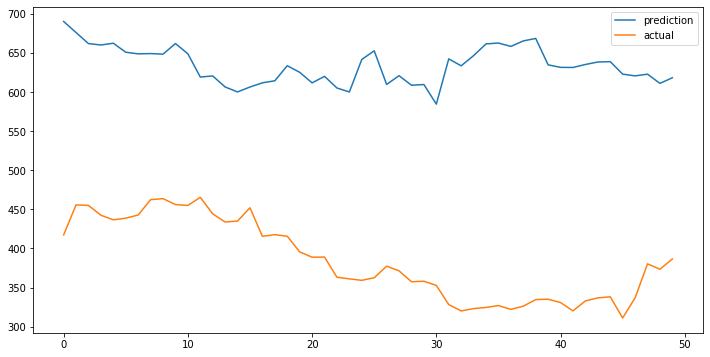

In [15]:
result.plot(figsize=(12,6))

In [16]:
result = predict_future_values(2200,50, 50)
result

,prediction,actual
0,1118.931588,853.61
1,1121.685173,797.07
2,1097.163051,822.04
3,1110.227971,845.59
4,1109.971494,863.91
5,1100.860869,870.20
6,1091.836258,870.96
7,1099.959648,840.00
8,1085.228621,814.64
9,1101.480877,835.63


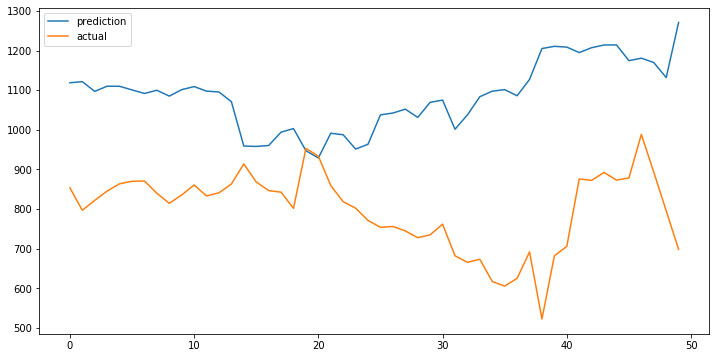

In [17]:
result.plot(figsize=(12,6))

In [18]:
def rmse(predicted_values):
    number_of_predictions = 0
    sum_of_square_differences = 0.0
    for row in predicted_values.itertuples(index=False):
        prediction = row[0]
        actual = row[1]
        
        sum_of_square_differences += (actual - prediction) ** 2
        number_of_predictions += 1
 
    return sum_of_square_differences / number_of_predictions

In [19]:
rmse(result)

100961.82384492818

In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [21]:
r2_score(result['actual'].values, result['prediction'].values)

-9.845925825793133

In [22]:
mean_squared_error(result['actual'].values, result['prediction'].values)

100961.82384492816